Copyright by Arjun Sarkar Research Group Applied Systems Biology - Head: Prof. Dr. Marc Thilo Figge https://www.leibniz-hki.de/en/applied-systems-biology.html HKI-Center for Systems Biology of Infection Leibniz Institute for Natural Product Research and Infection Biology - Hans Knöll Insitute (HKI) Adolf-Reichwein-Straße 23, 07745 Jena, Germany

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 as cv
import math
import os
from sklearn import preprocessing
import datetime

In [2]:
df = pd.read_csv('Label_patches.csv')
df.head()

,video_num,filename,patch_name,infection,patient
0,1,246,246_0_0.tif,ca,1
1,1,246,246_0_1.tif,ca,1
2,1,246,246_1_0.tif,ca,1
3,1,246,246_1_1.tif,ca,1
4,1,94,094_0_0.tif,ca,1


<AxesSubplot: xlabel='infection', ylabel='count'>

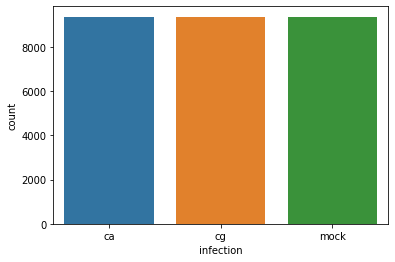

In [3]:
sns.countplot(x='infection',data=df)

In [4]:
le = preprocessing.LabelEncoder()
le.fit(df.infection)
df['class_label'] = le.transform(df.infection)

df

,video_num,filename,patch_name,infection,patient,class_label
0,1,246,246_0_0.tif,ca,1,0
1,1,246,246_0_1.tif,ca,1,0
2,1,246,246_1_0.tif,ca,1,0
3,1,246,246_1_1.tif,ca,1,0
4,1,94,094_0_0.tif,ca,1,0
...,...,...,...,...,...,...
28075,35,250,250_1_1.tif,mock,12,2
28076,35,227,227_0_0.tif,mock,12,2
28077,35,227,227_0_1.tif,mock,12,2
28078,35,227,227_1_0.tif,mock,12,2


In [5]:
path = '/asbdata/Arjun/Bloodi/Patches/'
df['path']=path
df

,video_num,filename,patch_name,infection,patient,class_label,path
0,1,246,246_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/
1,1,246,246_0_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/
2,1,246,246_1_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/
3,1,246,246_1_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/
4,1,94,094_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/
...,...,...,...,...,...,...,...
28075,35,250,250_1_1.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/
28076,35,227,227_0_0.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/
28077,35,227,227_0_1.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/
28078,35,227,227_1_0.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/


In [6]:
df['image_path']=df['path']+(df['video_num']).astype(str)+'/'+df['patch_name']
df

,video_num,filename,patch_name,infection,patient,class_label,path,image_path
0,1,246,246_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/,/asbdata/Arjun/Bloodi/Patches/1/246_0_0.tif
1,1,246,246_0_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/,/asbdata/Arjun/Bloodi/Patches/1/246_0_1.tif
2,1,246,246_1_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/,/asbdata/Arjun/Bloodi/Patches/1/246_1_0.tif
3,1,246,246_1_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/,/asbdata/Arjun/Bloodi/Patches/1/246_1_1.tif
4,1,94,094_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/,/asbdata/Arjun/Bloodi/Patches/1/094_0_0.tif
...,...,...,...,...,...,...,...,...
28075,35,250,250_1_1.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/,/asbdata/Arjun/Bloodi/Patches/35/250_1_1.tif
28076,35,227,227_0_0.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/,/asbdata/Arjun/Bloodi/Patches/35/227_0_0.tif
28077,35,227,227_0_1.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/,/asbdata/Arjun/Bloodi/Patches/35/227_0_1.tif
28078,35,227,227_1_0.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/,/asbdata/Arjun/Bloodi/Patches/35/227_1_0.tif


In [7]:
df = df.drop('path',1)
df

/tmp/ipykernel_3392635/2747942235.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('path',1)


,video_num,filename,patch_name,infection,patient,class_label,image_path
0,1,246,246_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/246_0_0.tif
1,1,246,246_0_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/246_0_1.tif
2,1,246,246_1_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/246_1_0.tif
3,1,246,246_1_1.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/246_1_1.tif
4,1,94,094_0_0.tif,ca,1,0,/asbdata/Arjun/Bloodi/Patches/1/094_0_0.tif
...,...,...,...,...,...,...,...
28075,35,250,250_1_1.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/250_1_1.tif
28076,35,227,227_0_0.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/227_0_0.tif
28077,35,227,227_0_1.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/227_0_1.tif
28078,35,227,227_1_0.tif,mock,12,2,/asbdata/Arjun/Bloodi/Patches/35/227_1_0.tif


In [8]:
df.to_csv('Label_Patches_Training.csv',index = False)